# Обработка пропусков и выбросов в процессе первичного анализа статистики

### Disclaimer: 
_Представленные ниже примеры предназначены исключительно для демонстрации подходов к устранению аномалий в данных. Выбор подхода в "боевых условиях" должен осуществляеться в соответсвии с решаемыми задачами и с учетом особенностей формирования данных в исследуемом процессе_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка датасета

In [2]:
data = pd.read_csv("iris.csv")
data.tail(7)

,sepal.length,sepal.width,petal.length,petal.width,variety
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


### Добавляем немного NaN

In [3]:
data["petal.width"].iloc[145:149] = None
data.tail(7)

<ipython-input-3-f9397a5d621b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[145:149] = None


,sepal.length,sepal.width,petal.length,petal.width,variety
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,NaN,Virginica
146,6.3,2.5,5.0,NaN,Virginica
147,6.5,3.0,5.2,NaN,Virginica
148,6.2,3.4,5.4,NaN,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## Построение гистограммы "petal.length"

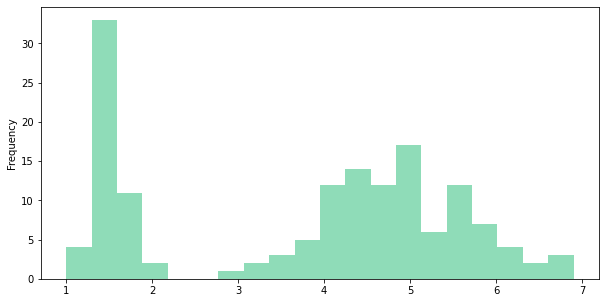

In [4]:
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### Есть выброс "petal.length" в диапазоне примерно 1..1.9

### Зафиксируем исходные данные до заполнения NaN 

In [5]:
with_outliers = data["petal.length"].head(20).copy()
before_NaN = data["petal.width"].iloc[25:42].copy()

### Заменяем  выброс "petal.length" расчетными данными

#### длина лепестка не может быть отрицательной!

<ipython-input-6-7dd704a31cea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.length"][data["petal.length"]<=2.8] = np.clip(np.random.normal(loc= data["petal.length"][data["petal.length"]>=2.8].median(),


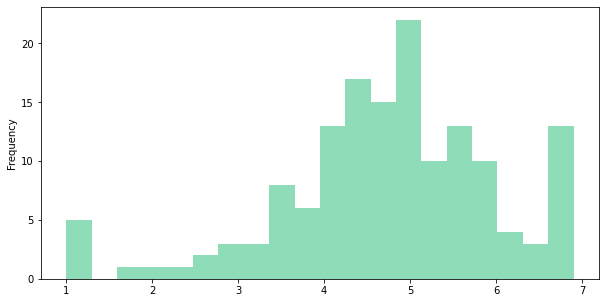

In [6]:
data["petal.length"][data["petal.length"]<=2.8] = np.clip(np.random.normal(loc= data["petal.length"][data["petal.length"]>=2.8].median(),
                                                        scale=data["petal.length"].var(), 
                                                        size=len(data["petal.length"][data["petal.length"]<=2.8])), 
                                                          data["petal.length"].min(),
                                                          data["petal.length"].max())
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [7]:
### снова выбросы :-(
### убираем выброс минимумов ...

<ipython-input-8-2a7dfbc4bd5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.length"][data["petal.length"]==data["petal.length"].min()] = np.clip(np.random.normal(loc= data["petal.length"].median(),


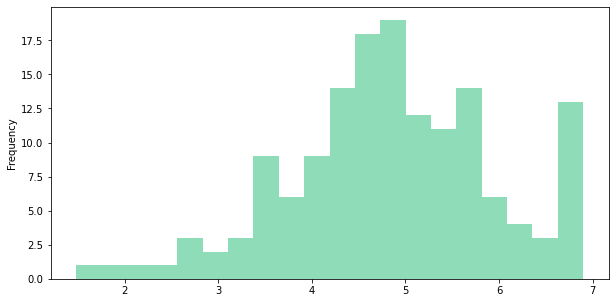

In [8]:
data["petal.length"][data["petal.length"]==data["petal.length"].min()] = np.clip(np.random.normal(loc= data["petal.length"].median(),
                                                        scale=data["petal.length"].var(), 
                                                        size=len(data["petal.length"][data["petal.length"]==data["petal.length"].min()]) ), 
                                                          data["petal.length"].min(),
                                                          data["petal.length"].max())



data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### ... и убираем выброс максимумов 

<ipython-input-9-1d557c6b9939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.length"][data["petal.length"]==data["petal.length"].max()] = np.clip(np.random.normal(loc= data["petal.length"].median(),


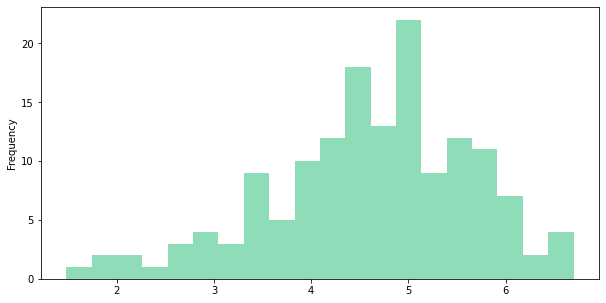

In [9]:
data["petal.length"][data["petal.length"]==data["petal.length"].max()] = np.clip(np.random.normal(loc= data["petal.length"].median(),
                                                        scale=data["petal.length"].var(), 
                                                        size=len(data["petal.length"][data["petal.length"]==data["petal.length"].max()]) ), 
                                                          data["petal.length"].min(),
                                                          data["petal.length"].max())
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [10]:
display(pd.DataFrame(list(zip(with_outliers, data["petal.length"].head(20))),
                   columns=["With_outliers", "After_norm"]))

,With_outliers,After_norm
0,1.4,5.992756
1,1.4,3.464943
2,1.3,3.567716
3,1.5,4.448111
4,1.4,3.774804
5,1.7,5.913794
6,1.4,6.007994
7,1.5,2.666121
8,1.4,3.281731
9,1.5,2.779941


###### Выброс исчез

## Построение гистограмы для "petal.width"

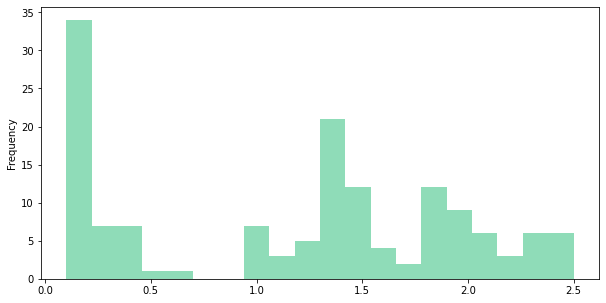

In [11]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### убеждаемся в наличии NaN

In [12]:
data["petal.width"][data["petal.width"].isnull()]

145   NaN
146   NaN
147   NaN
148   NaN
Name: petal.width, dtype: float64

### Заполняем пропуски

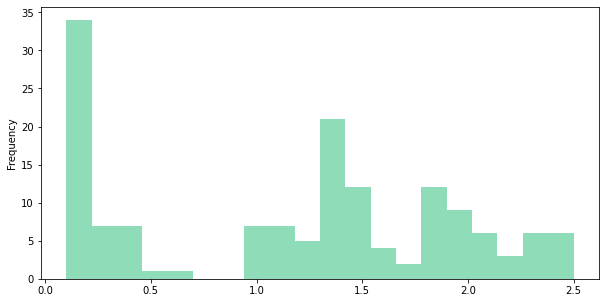

In [13]:
# используем std()
data["petal.width"].fillna(data["petal.width"].mean() 
                           + data["petal.width"].std()*np.random.randint(low=-1, high=2, size=1)[0], # ограничиваем отклонение
                          inplace=True)
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [14]:
data["petal.width"].tail(7)

143    2.300000
144    2.500000
145    1.173973
146    1.173973
147    1.173973
148    1.173973
149    1.800000
Name: petal.width, dtype: float64

### добавим еще пропусков (примерно 1/6)

<ipython-input-15-d66d3094cd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[125:139] = None
<ipython-input-15-d66d3094cd4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[25:42] = None


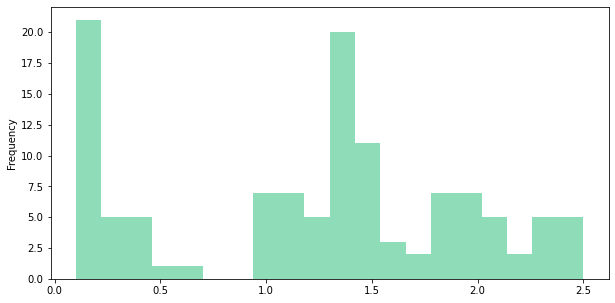

In [15]:
data["petal.width"].iloc[125:139] = None
data["petal.width"].iloc[25:42] = None
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [16]:
data["petal.width"].iloc[25:42]

25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
Name: petal.width, dtype: float64

### Подготовка корректирующих значений

In [17]:
df_corr = pd.DataFrame(np.random.normal(loc=data["petal.width"].mean(),
                                scale=data["petal.width"].var(), 
                                size=len(data["petal.width"])),
                      columns = ["petal.width"]) 
                                
df_corr                      

,petal.width
0,1.190797
1,0.663194
2,0.447149
3,0.979915
4,1.211650
...,...
145,1.939442
146,0.556354
147,0.449163
148,1.281174


In [18]:
df_corr.min() # больше нуля :-)

petal.width   -0.169166
dtype: float64

### Заполняем пропуски

In [19]:
data.fillna(value=df_corr, inplace=True)
display(pd.DataFrame(list(zip(before_NaN, data["petal.width"].iloc[25:42])),
                   columns=["before_set_NaN", "After_filling"]))

,before_set_NaN,After_filling
0,0.2,1.363157
1,0.4,0.815530
2,0.2,1.329894
3,0.2,0.888561
4,0.2,1.640098
5,0.2,1.391351
6,0.4,0.512820
7,0.1,1.756992
8,0.2,1.344511
9,0.2,0.847376


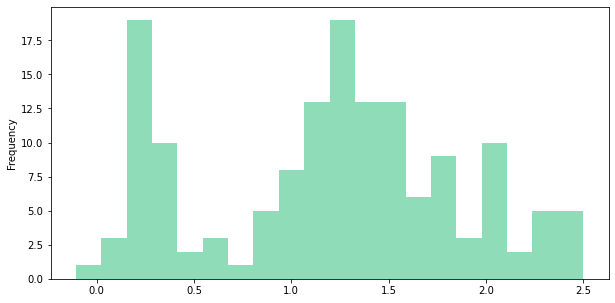

In [20]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### Почти похоже на исходный :-)

### Снова генерируем пропуски, но в этот раз удаляем 

In [21]:
data["petal.width"].iloc[125:147] = None
data.tail(10)

<ipython-input-21-596890d67ab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[125:147] = None


,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,NaN,Virginica
141,6.9,3.1,5.1,NaN,Virginica
142,5.8,2.7,5.1,NaN,Virginica
143,6.8,3.2,5.9,NaN,Virginica
144,6.7,3.3,5.7,NaN,Virginica
145,6.7,3.0,5.2,NaN,Virginica
146,6.3,2.5,5.0,NaN,Virginica
147,6.5,3.0,5.2,1.173973,Virginica
148,6.2,3.4,5.4,1.173973,Virginica
149,5.9,3.0,5.1,1.800000,Virginica


In [22]:
data.dropna(inplace=True)
data.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
118,7.7,2.6,3.491876,2.300000,Virginica
119,6.0,2.2,5.000000,1.500000,Virginica
120,6.9,3.2,5.700000,2.300000,Virginica
121,5.6,2.8,4.900000,2.000000,Virginica
122,7.7,2.8,6.700000,2.000000,Virginica
123,6.3,2.7,4.900000,1.800000,Virginica
124,6.7,3.3,5.700000,2.100000,Virginica
147,6.5,3.0,5.200000,1.173973,Virginica
148,6.2,3.4,5.400000,1.173973,Virginica
149,5.9,3.0,5.100000,1.800000,Virginica


### "Пропали" все строки с пропусками

## Заполняем смешанные пропуски
#### ...но сначала их создадим ))

In [23]:
display(data.head())
data.iloc[0:3] = None
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,5.992756,0.2,Setosa
1,4.9,3.0,3.464943,0.2,Setosa
2,4.7,3.2,3.567716,0.2,Setosa
3,4.6,3.1,4.448111,0.2,Setosa
4,5.0,3.6,3.774804,0.2,Setosa


,sepal.length,sepal.width,petal.length,petal.width,variety
0,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,None
3,4.6,3.1,4.448111,0.2,Setosa
4,5.0,3.6,3.774804,0.2,Setosa


In [24]:
values = {"sepal.length": data["sepal.length"][data["variety"]=="Setosa"].mean(),
          "sepal.width": data["sepal.width"][data["variety"]=="Setosa"].mean(), 
          "petal.length": data["petal.length"][data["variety"]=="Setosa"].median(), 
          "petal.width": data["petal.width"][data["variety"]=="Setosa"].median(),
          "variety": "Setosa"}
data.fillna(value=values, inplace=True)
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.012766,3.440426,4.270174,0.3,Setosa
1,5.012766,3.440426,4.270174,0.3,Setosa
2,5.012766,3.440426,4.270174,0.3,Setosa
3,4.600000,3.100000,4.448111,0.2,Setosa
4,5.000000,3.600000,3.774804,0.2,Setosa


## Extra case. Infinity

In [25]:
data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))
data.iloc[15:19]

<ipython-input-25-4ca883aff204>:1: RuntimeWarning: divide by zero encountered in log
  data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))
<ipython-input-25-4ca883aff204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))


,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,4.058695,inf,Setosa
16,5.4,3.9,5.020779,-inf,Setosa
17,5.1,3.5,5.193565,inf,Setosa
18,5.7,3.8,3.434088,-inf,Setosa


### Гистограмма не строится при наличии inf

In [26]:
data["petal.width"].describe()

count    128.000000
mean            NaN
std             NaN
min            -inf
25%        0.578205
50%        1.300000
75%        1.610025
max             inf
Name: petal.width, dtype: float64

In [27]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );
# Ой! Что-то пойдет не так!

ValueError: autodetected range of [-inf, inf] is not finite

## Заменяем inf и -inf на NaN

In [28]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.iloc[14:20]

,sepal.length,sepal.width,petal.length,petal.width,variety
14,5.8,4.0,6.450229,0.2,Setosa
15,5.7,4.4,4.058695,NaN,Setosa
16,5.4,3.9,5.020779,NaN,Setosa
17,5.1,3.5,5.193565,NaN,Setosa
18,5.7,3.8,3.434088,NaN,Setosa
19,5.1,3.8,3.575020,0.3,Setosa


### а дальше дело техники...

# Устранение пропусков в линиях/рядах

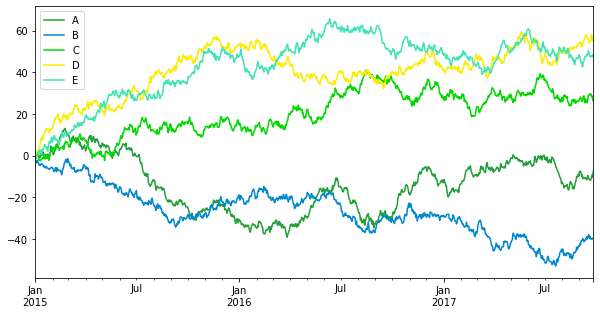

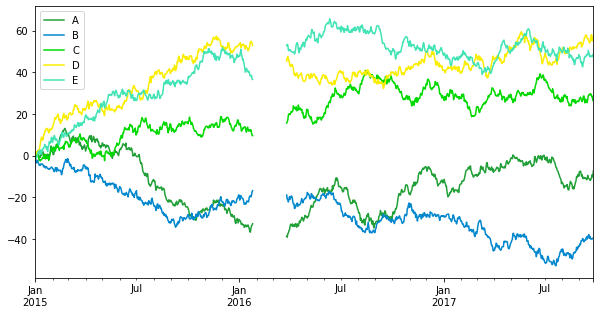

In [29]:
sbercolors = ['#21A038','#0087CD','#00D900', '#FAED00',  '#42E3B4','#21BA72'] 
image_params = dict(figsize=(10,5), 
                color=sbercolors)
samples = np.random.randn(1000, 5)

df = pd.DataFrame(samples, 
                   index=pd.date_range("1/1/2015", periods=1000),
                   columns=list("ABCDE"))
df = df.cumsum()
df.plot(**image_params);    
before = df.iloc[400:420].copy()        
df.iloc[390:450] = None

df.plot(**image_params);
  

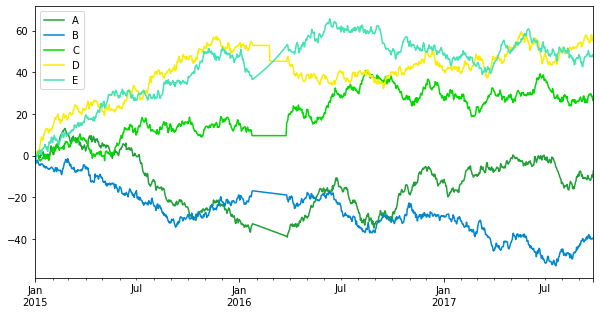

In [30]:
to_fill = {"A": df["A"].interpolate(method='linear'),
           "B": df["B"].interpolate(method='time'),
           "C": df["C"].interpolate(method='pad'),
           "D": df["D"].interpolate(method='nearest'),
           "E": df["E"].interpolate(method='akima'),}
df.fillna(value=to_fill, inplace=True)
df.plot(**image_params);


In [31]:
to_check = pd.concat((before,df.iloc[400:420]), axis=1)
to_check.columns = pd.MultiIndex.from_product([['Before', 'Recycled'], df.columns,],
                                     names=['subject', 'type'])

display(to_check) 

subject        Before                                               Recycled  \
type                A          B          C          D          E          A   
2016-02-05 -31.512326 -17.154165  15.125537  55.370078  43.350697 -33.798328   
2016-02-06 -31.633524 -15.552095  15.911629  54.989831  42.399203 -33.897477   
2016-02-07 -31.878710 -16.214215  13.737635  54.215866  41.803116 -33.996625   
2016-02-08 -32.275170 -16.321162  13.663526  51.448430  42.381857 -34.095774   
2016-02-09 -32.298059 -15.807788  13.232434  51.041739  42.163593 -34.194923   
2016-02-10 -33.417198 -16.247909  11.434600  51.590265  43.169064 -34.294072   
2016-02-11 -34.413892 -16.338290  12.348497  51.376749  42.784420 -34.393220   
2016-02-12 -34.499178 -16.735907  12.821521  52.738193  42.148927 -34.492369   
2016-02-13 -37.160213 -17.570839  13.486300  53.203638  40.939273 -34.591518   
2016-02-14 -37.394932 -14.864706  12.965892  52.302992  40.148085 -34.690666   
2016-02-15 -37.619429 -16.235452  11.743089  53.712511  41.674973 -34.789815   
2016-02-16 -37.598057 -16.551851  11.554911  52.974033  41.942130 -34.888964   
2016-02-17 -36.515744 -15.619271  10.387819  52.672681  42.383311 -34.988113   
2016-02-18 -35.862898 -16.632929  10.442778  53.329564  42.013188 -35.087261   
2016-02-19 -35.593438 -18.065719  10.589871  50.767400  41.033599 -35.186410   
2016-02-20 -35.769131 -16.708118  12.498029  50.421222  41.223409 -35.285559   
2016-02-21 -35.529744 -17.912150  13.489613  50.692416  40.060969 -35.384708   
2016-02-22 -35.036472 -19.555277  14.067833  50.399468  39.038877 -35.483856   
2016-02-23 -34.119280 -19.892343  16.425506  49.298512  40.804466 -35.583005   
2016-02-24 -34.799606 -20.345818  17.152626  49.695394  42.362182 -35.682154   

subject                                                
type                B         C          D          E  
2016-02-05 -17.265113  9.589937  52.913498  38.972250  
2016-02-06 -17.298463  9.589937  52.913498  39.196821  
2016-02-07 -17.331814  9.589937  52.913498  39.422865  
2016-02-08 -17.365165  9.589937  52.913498  39.650426  
2016-02-09 -17.398515  9.589937  52.913498  39.879550  
2016-02-10 -17.431866  9.589937  52.913498  40.110281  
2016-02-11 -17.465217  9.589937  52.913498  40.342665  
2016-02-12 -17.498567  9.589937  52.913498  40.576746  
2016-02-13 -17.531918  9.589937  52.913498  40.812570  
2016-02-14 -17.565269  9.589937  52.913498  41.050182  
2016-02-15 -17.598619  9.589937  52.913498  41.289626  
2016-02-16 -17.631970  9.589937  52.913498  41.530947  
2016-02-17 -17.665321  9.589937  52.913498  41.774191  
2016-02-18 -17.698671  9.589937  52.913498  42.019403  
2016-02-19 -17.732022  9.589937  52.913498  42.266627  
2016-02-20 -17.765372  9.589937  52.913498  42.515909  
2016-02-21 -17.798723  9.589937  52.913498  42.767293  
2016-02-22 -17.832074  9.589937  52.913498  43.020825  
2016-02-23 -17.865424  9.589937  52.913498  43.276549  
2016-02-24 -17.898775  9.589937  52.913498  43.534511

In [32]:
# set colors for min, max. average values
color_set = pd.DataFrame({"Colors":("MAX", "MIN", "AVERANGE")})

def highlight_fill(s):
    colors =  ['background-color: #42E3B4',
            'background-color: #0087CD',
             'background-color: #FAED00']
    return [colors[0] if i==0 else  colors[1] if i==1 else colors[2] for i in range(len(s))]


color_set = color_set.style.apply(highlight_fill)
display(color_set)

# count accurancy values

accurancy = pd.concat( (before-df.iloc[400:420],
                       pow((before-df.iloc[400:420]),2)), axis=1) 
accurancy.columns = pd.MultiIndex.from_product([['ABS', 'SQR'], df.columns,],
                                     names=['subject', 'type'])
# adding a row
accurancy.loc[-1] = [accurancy[a_s].mean() for a_s in accurancy.columns[:5].tolist()] +\
                    [np.sqrt(accurancy[a_s].sum()/(len(accurancy)-1)) for a_s in accurancy.columns[5:].tolist()]  

def highlight_diff_max(s):
    try: 
        idx = s.tolist().index(max(abs(s)))
    except ValueError:
        idx = s.tolist().index(min(s))
    return ['background-color: #42E3B4' if i==idx else '' for i in range(len(s))]

def highlight_diff_min(s):
    try: 
        idx = s.tolist().index(min(abs(s)))
    except ValueError:
        idx = s.tolist().index(max(s))
    return ['background-color: #0087CD' if i==idx else '' for i in range(len(s))]

def highlight_last_row(s):
    return ['background-color: #FAED00' if i==len(s)-1 else '' for i in range(len(s))]

accurancy = accurancy.style.apply(highlight_last_row).apply(highlight_diff_max).apply(highlight_diff_min)
accurancy


,Colors
0,MAX
1,MIN
2,AVERANGE


#### Среднеквадратическая погрешность в целом меньше по всем значениям в столбце, чем в отдельных сравнениях